# Plotting charts with visual identity

Mygraphics library enable plotting charts preserving visual identity, commonly change the type of chart transparently.  
Functions usually require a $data.frame$ with three attributes: $x$, $variable$, $value$. 
The variable is a required parameter for all examples. 

## Library
The library $myGraphics.R$ has a function named loadlibrary that is responsible for checking installed packages. 
Once the package is installed, it is loaded.

Take some time looking at the parameters of functions available at https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R. They can can help set up your graphics. 

In [1]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myGraphics.R")
loadlibrary("reshape")
loadlibrary("dplyr")
loadlibrary("RColorBrewer")
loadlibrary("gridExtra")

## Color palette

Color brewer is a nice toll to setup color for your graphics. 

In [2]:
col_set <- brewer.pal(11, 'Spectral')
col_2 <- col_set[c(4,9)]
col_2b <- col_set[c(9,3)]    
col_3 <- col_set[c(4,9,11)]
col_4 <- col_set[c(3,5,7,9)]   

plot_size(4, 3)

## Datasets for the examples

This function creates the basic dataset used in the examples.

In [3]:
create_dataset <- function() {
  data <- read.table(text = "Year Months Flights Delays
                     2016 Jan-Mar 11 6
                     2016 Apr-Jun 12 5
                     2016 Jul-Sep 13 3
                     2016 Oct-Dec 12 5
                     2017 Jan-Mar 10 4
                     2017 Apr-Jun 9 3
                     2017 Jul-Sep 11 4
                     2017 Oct-Dec 25 15
                     2018 Jan-Mar 14 3
                     2018 Apr-Jun 12 5
                     2018 Jul-Sep 13 3
                     2018 Oct-Dec 15 4",
                     header = TRUE,sep = "")  
  data$OnTime <- data$Flights - data$Delays 
  data$Perc <- round(100 * data$Delays / data$Flights)
  return(data)
}

data <- create_dataset()
head(data)

Year,Months,Flights,Delays,OnTime,Perc
2016,Jan-Mar,11,6,5,55
2016,Apr-Jun,12,5,7,42
2016,Jul-Sep,13,3,10,23
2016,Oct-Dec,12,5,7,42
2017,Jan-Mar,10,4,6,40
2017,Apr-Jun,9,3,6,33


Data adjustment for ggplot usage:

In [4]:
adjust_dataset <- function(data) {
  data <- melt(data[,c('Year', 'Months', 'Flights', 'Delays', 'OnTime', 'Perc')], id.vars = c(1,2))
  data$x <- sprintf("%d-%s", data$Year, data$Months)
  data$x <- factor(data$x,levels = data$x[1:12])
  return(data)
}
data <- adjust_dataset(data)
head(data)

Year,Months,variable,value,x
2016,Jan-Mar,Flights,11,2016-Jan-Mar
2016,Apr-Jun,Flights,12,2016-Apr-Jun
2016,Jul-Sep,Flights,13,2016-Jul-Sep
2016,Oct-Dec,Flights,12,2016-Oct-Dec
2017,Jan-Mar,Flights,10,2017-Jan-Mar
2017,Apr-Jun,Flights,9,2017-Apr-Jun


## Scatter plot

This example filters data for flights and delays. It uses two colors and setup $x$ and $y$ labels. 

The function returns a preset graphic that can be enhanced. In this case, we change the $x$ labels orientations and add a centered title.

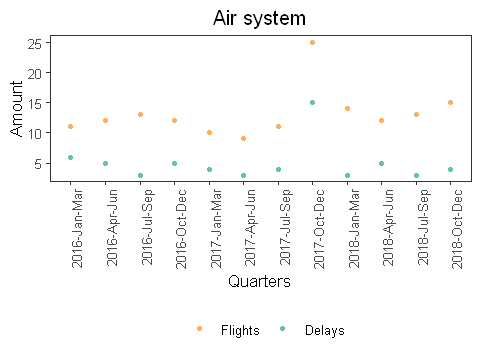

In [5]:
grf <- plot.scatter(data %>% filter(variable %in% c('Flights', 'Delays')), 
                     colors=col_2, label_x = "Quarters", label_y = "Amount") 
grf <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
grf <- grf + ggtitle("Air system") + theme(plot.title = element_text(hjust = 0.5))

plot(grf)

## Line plot
This example filters data for flights and delays. It uses the default configuration and extends the $x$ labels orientation to 45 degrees. 

It is very important to try to associate the same color for a certain data/method. In this case, delays and flights are presented in the same color as in the previous graphic. 

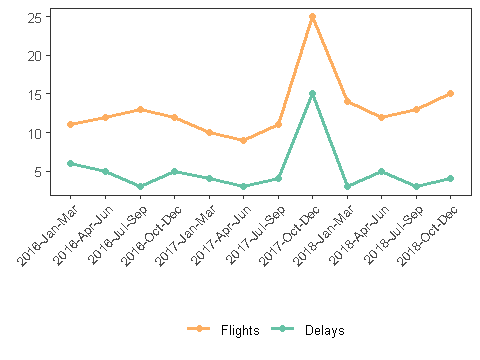

In [6]:
grf <- plot.series(data %>% filter(variable %in% c('Flights', 'Delays')),colors=col_2) 
grf <- grf + theme(axis.text.x = element_text(angle=45, hjust=1))

plot(grf)

## Bar graph
This graphic filters data for flights and presents the first 11 quarters. Each quarter is presented in a specific color. 
The function $coord\_flip()$ enables horizontal bar plot.
The function $grid.arrange()$ can put graphics side by side.

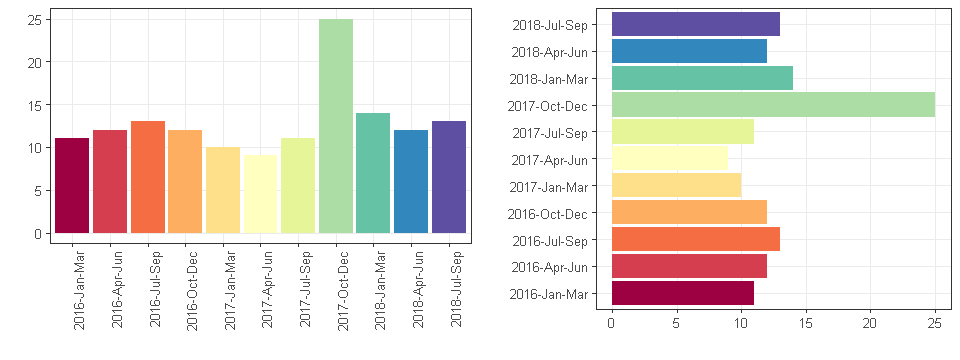

In [36]:
grf <- plot.bar(data[1:11,] %>% filter(variable=='Flights') %>% select(variable=x, value=value), colors=col_set)
grfA <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
grfB <- grf + coord_flip()

plot_size(8, 3)
grid.arrange(grfA, grfB, ncol=2)
plot_size(4, 3)

## Bar graph with error bars
This presents the average and the standard deviation of delays per quarters through the years. 
For that, it aggregates mean and sd values according to quarters. 
The conversion of the variable to factor is to sort it according to quarter semantics, instead of alphabetical order. 
The error bar is added using $geom\_errorbar()$ function. 

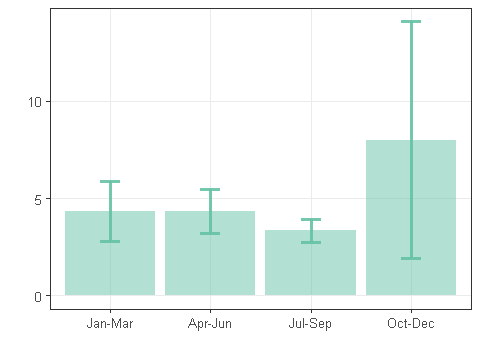

In [37]:
data_sd <- create_dataset() %>% 
  select(variable=Months, value=Delays) %>% 
  group_by(variable) %>% 
  summarize(sd = sd(value), value = mean(value))

data_sd$variable <- factor(data_sd$variable,levels = c('Jan-Mar','Apr-Jun','Jul-Sep','Oct-Dec'))

grf <- plot.bar(data_sd, colors=col_2[2], alpha=0.5)
grf <- grf + geom_errorbar(aes(x=variable, ymin=value-sd, ymax=value+sd), width=0.2, colour=col_2[2], alpha=0.9, size=1.1) 

plot(grf)


## Grouped bar & Stacked-bar

Grouped bar or stacked bars can present different perspectives for the same data.


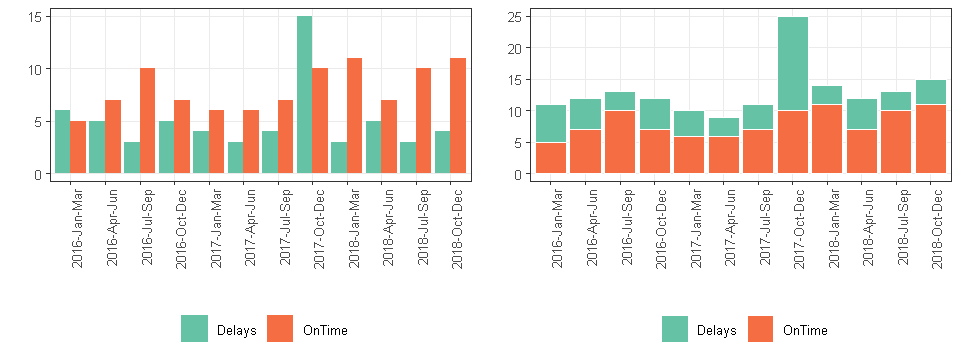

In [38]:
grfA <- plot.bar(data %>% filter(variable %in% c('OnTime', 'Delays')), colors=col_2b, group=TRUE)
grfA <- grfA + theme(axis.text.x = element_text(angle=90, hjust=1))
grfB <- plot.stackedbar(data %>% filter(variable %in% c('OnTime', 'Delays')), colors=col_2b) 
grfB <- grfB + theme(axis.text.x = element_text(angle=90, hjust=1))

plot_size(8, 3)
grid.arrange(grfA, grfB, ncol=2)
plot_size(4, 3)

## Faced grouped bar
This graphic uses a facing column to group data. 
It filters data for on-time and delayed flights. 

In this graphic, labels are set for $x$ and $y$ axis and legend.

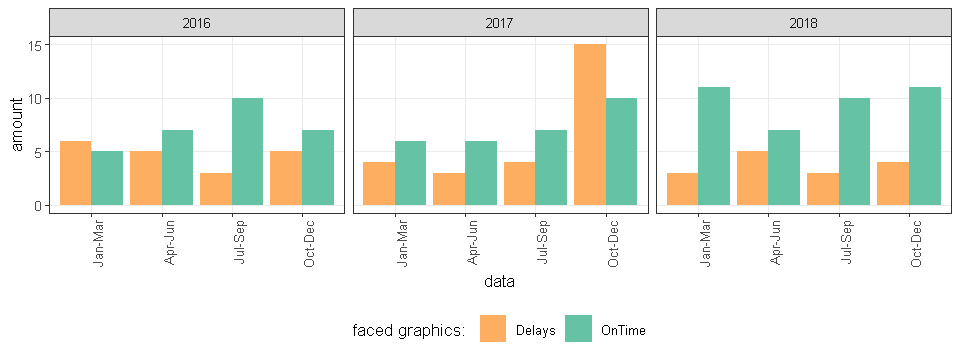

In [39]:
grf <- plot.bar(data %>% filter(variable %in% c('OnTime', 'Delays')) %>% 
                select(x=Months, face=Year, variable=variable, value=value), group=TRUE, colors=col_2)
grf <- grf + theme(axis.text.x = element_text(angle=90, hjust=1))
grf <- grf + facet_wrap(~face, ncol = 3) 
grf <- grf + xlab("data")
grf <- grf + guides(fill=guide_legend(title="faced graphics:"))
grf <- grf + ylab("amount")

plot_size(8, 3)
plot(grf)
plot_size(4, 3)

## Pie chart
In this graphic data is filtered for the year 2016 and only include flights. 
For each quarter it is associated with a pie-slice with a color. 
The conversion of the variable to factor enables ordering the legend according to the semantics of the data instead of alphabetical sort. 

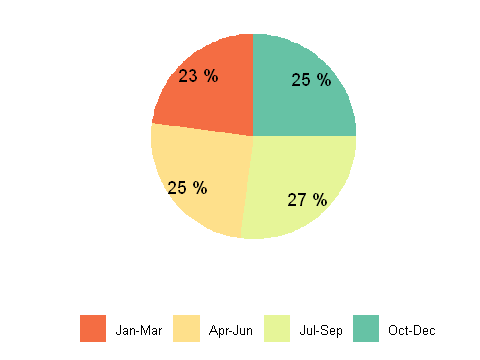

In [40]:
mypiedata <- data %>% filter(Year == 2016 & variable =="Flights") %>% select(variable=Months, value=value)
mypiedata$variable <- factor(mypiedata$variable,levels = c('Oct-Dec', 'Jul-Sep', 'Apr-Jun', 'Jan-Mar'))
mypiedata$colors <- col_4
mypiedata <- prepare.pieplot(mypiedata)

grf <- plot.pieplot(mypiedata, colors=as.character(mypiedata$colors))

plot(grf)

## Radar plot
In this graphic data is filtered for the year 2016 and only include delays. 
For each quarter it is associated with an axis. 
The conversion of the variable to factor enables ordering the legend according to the semantics of the data instead of alphabetical sort. 
The $ylim$ function is used to force minimum value to be equal to 0.

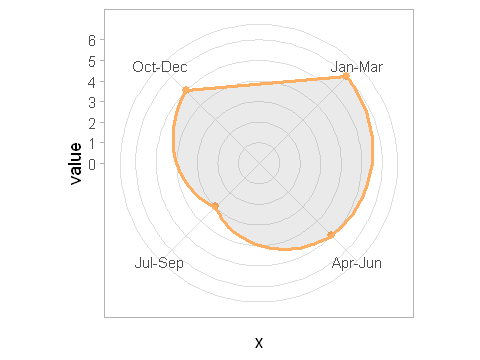

In [41]:
radar_data <- data %>% filter(Year==2016 & variable=='Delays') %>% select(x = Months, value=value)
radar_data$x <- factor(radar_data$x,levels = c('Jan-Mar','Apr-Jun','Jul-Sep','Oct-Dec'))

grf <- plot.radar(series=radar_data, color=col_2[1])
grf <- grf + ylim(0, round(max(radar_data$value)))

plot(grf)

## Lollipop plot

In this graphic, only the percentage of delayed flights is presented. 
This is a nice way to avoid using bar plots or pie charts.

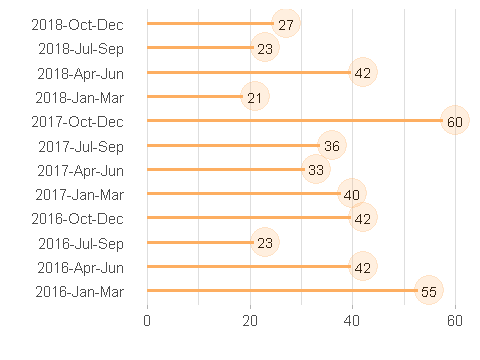

In [42]:
grf <- plot_lollipop(data %>% filter(variable =="Perc") %>% select(variable=x,value=value), col_2[1], max_value_gap=2.25)

plot(grf)

## Dot plot
In this graphic data is filtered for the year 2016 and the goal is to compare the number of delays with respect to on time flights. 

Data is plotted in ascending order of the values of the first variable in the dataset (Delays, displayed in orange). 

It is also important to observe that the function $plot\_dotchar$ internally uses $ggdotchart$, which is not compatible with other $ggplot$ methods. Customizations should be done using $ggpar$ function, such as introducing a legend title. 


variable,x,value
Delays,Jan-Mar,6
Delays,Apr-Jun,5
Delays,Jul-Sep,3
Delays,Oct-Dec,5
OnTime,Jan-Mar,5
OnTime,Apr-Jun,7


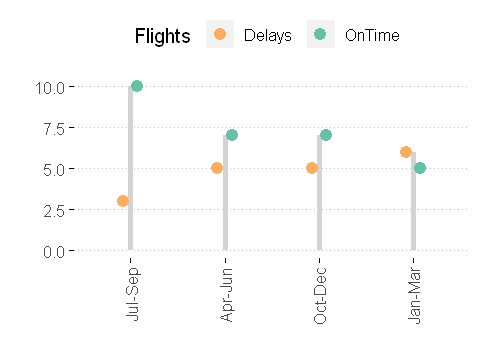

In [43]:
dotdata <- data %>% filter(variable %in% c("Delays", "OnTime") & Year==2016) %>% select(variable = variable, x = Months, value = value)
head(dotdata)

grf <- plot_dotchar(dotdata, color=col_2)
grf <- ggpar(grf,legend.title = 'Flights')

plot(grf)

## Ballon plot
This graph is able to combine two variables pair-wise. The intensity of this combination can be explored both by circle radius and color scale. It can be used to plot the correlation between all pairs of variables in a dataset, for example.

To present the $x$ and $y$ axis according a desired order, data need to be converted into factors. 

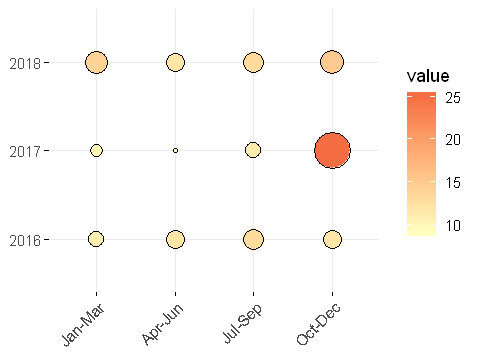

In [44]:
data_ballon <- data %>%  filter(variable == "Flights") %>% select(variable=Year, x=Months, value=value)
data_ballon$variable <- factor(data_ballon$variable,levels = sort(unique(data_ballon$variable)))
data_ballon$x <- factor(data_ballon$x,levels = c('Jan-Mar','Apr-Jun','Jul-Sep','Oct-Dec'))
data_ballon$radius <- data_ballon$value

grf <- plot_ballon(data_ballon, color = col_set[c(6,3)])

plot(grf)

## Examples using data distribution
The following examples use random variables so that different data distribution can be better viewed.

In [53]:
stdata <- data.frame(exponential = rexp(100000, rate = 1), 
                     uniform = runif(100000, min = 5.5, max = 6.5), 
                     normal = rnorm(100000, mean=5), 
                     poisson = rpois(100000, lambda = 2))
head(stdata)
stdata <- melt(stdata[,c('exponential', 'uniform', 'normal', 'poisson')])
head(stdata)

exponential,uniform,normal,poisson
1.5394895,5.616320,4.667070,1
1.8319631,5.793918,3.706081,2
0.2909431,6.199578,4.622207,3
2.2954778,6.297011,2.827749,1
0.1594824,6.334928,5.188988,5
0.5127594,5.871475,5.459524,2


Using  as id variables


variable,value
exponential,1.5394895
exponential,1.8319631
exponential,0.2909431
exponential,2.2954778
exponential,0.1594824
exponential,0.5127594


## Histogram
Histograms are used to plot a single variable.

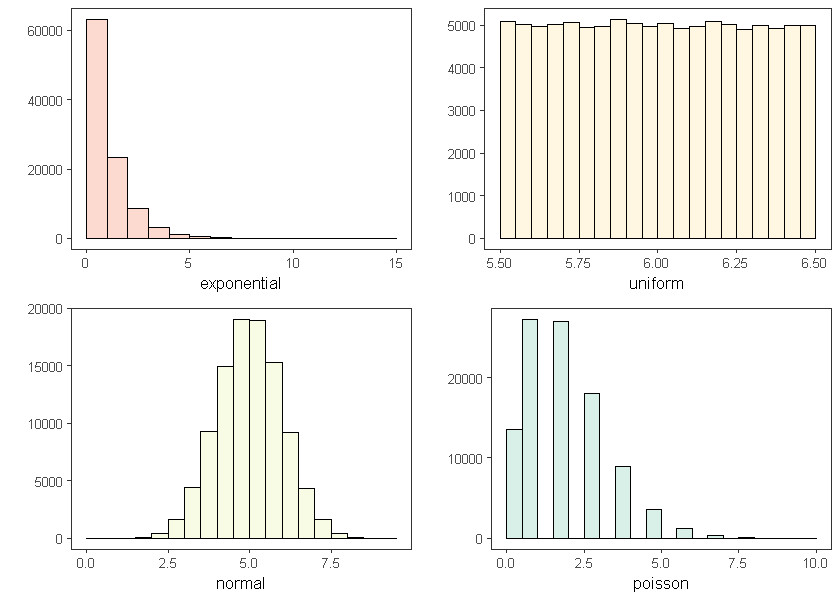

In [54]:
grfe <- plot.hist(stdata %>% filter(variable=='exponential'), label_x = "exponential", color=col_4[1])
grfu <- plot.hist(stdata %>% filter(variable=='uniform'), label_x = "uniform", color=col_4[2])
grfn <- plot.hist(stdata %>% filter(variable=='normal'), label_x = "normal", color=col_4[3])
grfp <- plot.hist(stdata %>% filter(variable=='poisson'), label_x = "poisson", color=col_4[4])

plot_size(7, 5)
grid.arrange(grfe, grfu, grfn, grfp,ncol=2)
plot_size(4, 3)

## Density plot
This graphic presents the on-time and delayed flights density distribution.

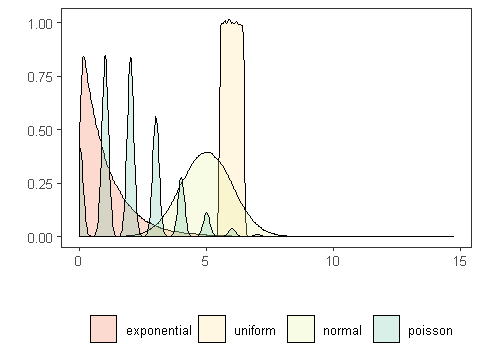

In [55]:
grf <- plot.density(stdata, label_series = "", colors=col_4)

plot(grf)

## Box-plot
This graphic presents the on-time and delayed flights boxplot.

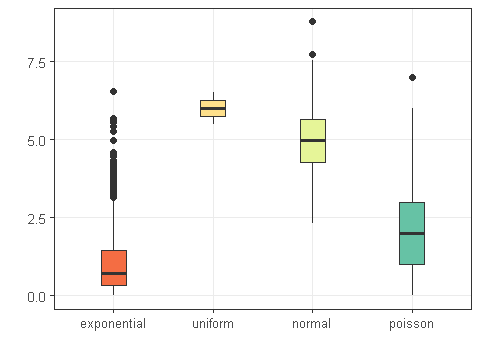

In [48]:
grf <- plot.boxplot(stdata, colors=col_4)
plot(grf)

## Building PDF from graphics

In [49]:
pdf("examples/plot.pdf", width=4, height=3)
plot(grfb)
dev.off()

png 
  2